In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


### Step 1: Load and Preprocess the Dataset
The Breast Cancer Wisconsin (Diagnostic) dataset is loaded, and the feature matrix is standardized to normalize the scale of features. This ensures that the clustering algorithm is not biased by features with large magnitudes.

**Steps:**
1. Load the dataset using `load_breast_cancer` from `sklearn.datasets`.
2. Extract the feature matrix (`X`) and true labels (`y`) for evaluation purposes.
3. Standardize the features using `StandardScaler` to ensure all features have a mean of 0 and a standard deviation of 1.

Below is the code for loading and preprocessing the dataset.


In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data  # Feature matrix
y = data.target  # True labels (for evaluation purposes)  --> used in only PCA visualization 

# Standardize the features (preprocessing)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


### Step 2: Implement K-Means Clustering
K-Means is implemented from scratch using NumPy. The algorithm iteratively assigns data points to the nearest cluster and updates cluster centroids until convergence or a maximum number of iterations is reached.

**Implementation Details:**
1. `__init__`: Initializes the number of clusters (\( k \)), maximum iterations, and convergence tolerance.
2. `fit`: 
   - Randomly initializes cluster centroids.
   - Iteratively assigns data points to the nearest cluster and updates centroids.
   - Stops when centroids converge or maximum iterations are reached.
3. `predict`: Assigns new data points to the nearest cluster.

**Notes:**
- For reproducibility, a random seed is set.
- The convergence criterion is based on the change in centroids being smaller than a set tolerance.

Below is the code for the K-Means class implementation.


In [3]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Randomly initialize cluster centroids
        np.random.seed(42)  # For reproducibility
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


### Step 3: First Experiment - K-Means Clustering
K-Means clustering is performed with \( k = 2 \), corresponding to the two main groups: benign and malignant.

**Steps:**
1. Fit the K-Means algorithm on the standardized feature matrix.
2. Extract predicted cluster labels.
3. Evaluate clustering performance using the Silhouette Score, which measures how well-separated the clusters are.

**Notes:**
- A higher Silhouette Score indicates better-defined clusters.
- Here, \( n_clusters = 2 \) is chosen because the dataset inherently has two groups.


In [4]:
# Initialize and fit KMeans
n_clusters = 2  # Since we have two groups: benign and malignant
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_normalized)

# Predicted labels
predicted_labels = kmeans.labels

# Silhouette Score helps evaluate how well the clusters are separated.
silhouette_avg = silhouette_score(X_normalized, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.3447


In [5]:
def compute_inertia(X, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - kmeans.centroids, axis=2)**2, axis=1)))
    return inertias


### Step 3: Evaluate Clustering with SSE and Elbow Method
To determine the optimal number of clusters, the Sum of Squared Errors (SSE) is calculated for \( k = 1 \) to \( k = 10 \). The elbow method is used to identify the \( k \) where adding clusters yields minimal improvement.

**Steps:**
1. Fit K-Means for \( k = 1 \) to \( k = 10 \).
2. Calculate SSE for each \( k \).
3. Plot the SSE values to identify the elbow point.

**Observation:**
- The elbow point is typically where the SSE curve flattens.
### Step 4: Visualize the Elbow Method
The SSE values are plotted against the number of clusters to visualize the elbow point. The elbow point represents the optimal number of clusters.

**Observation:**
- For this dataset, the elbow point is around \( k = 3 \).


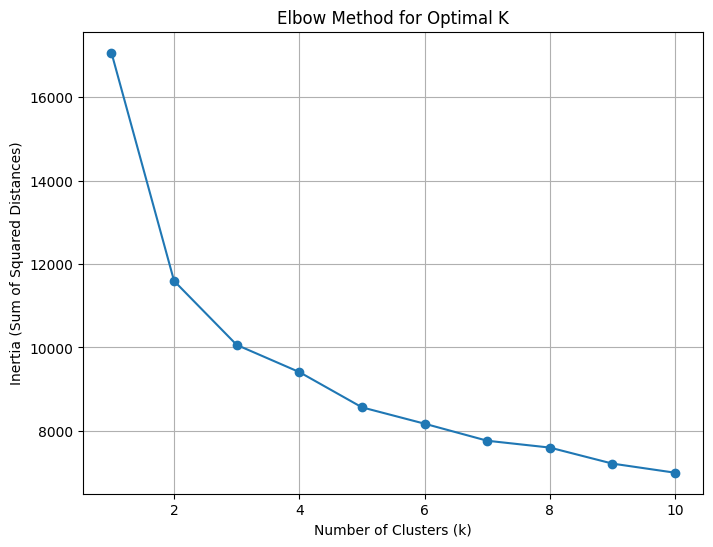

In [6]:
# Calculate inertia for k=1 to k=10
max_k = 10
inertias = compute_inertia(X_normalized, max_k)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid()
plt.show()


In [7]:
# Display SSE values
for k, inertia in enumerate(inertias, start=1):
    print(f"Number of Clusters: {k}, SSE: {inertia:.2f}")


Number of Clusters: 1, SSE: 17070.00
Number of Clusters: 2, SSE: 11595.68
Number of Clusters: 3, SSE: 10061.80
Number of Clusters: 4, SSE: 9409.83
Number of Clusters: 5, SSE: 8564.40
Number of Clusters: 6, SSE: 8171.85
Number of Clusters: 7, SSE: 7763.15
Number of Clusters: 8, SSE: 7599.01
Number of Clusters: 9, SSE: 7214.34
Number of Clusters: 10, SSE: 6995.96


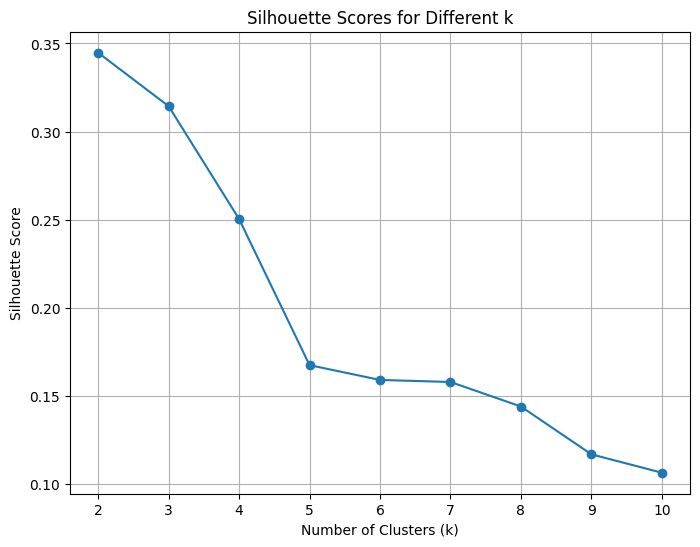

Number of Clusters: 2, Silhouette Score: 0.3447
Number of Clusters: 3, Silhouette Score: 0.3144
Number of Clusters: 4, Silhouette Score: 0.2504
Number of Clusters: 5, Silhouette Score: 0.1675
Number of Clusters: 6, Silhouette Score: 0.1592
Number of Clusters: 7, Silhouette Score: 0.1580
Number of Clusters: 8, Silhouette Score: 0.1441
Number of Clusters: 9, Silhouette Score: 0.1170
Number of Clusters: 10, Silhouette Score: 0.1065


In [8]:
# Compute silhouette scores for k=2 to k=10
silhouette_scores = []
for k in range(2, max_k + 1):  # Silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_normalized)
    predicted_labels = kmeans.labels
    silhouette_scores.append(silhouette_score(X_normalized, predicted_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Display Silhouette Scores
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")


### Step 5: Observations and Conclusions
**Key Metrics:**
- **Silhouette Score**: Evaluates cluster separation. A higher value indicates well-defined clusters. For \( k = 2 \), the Silhouette Score is calculated as shown above.
- **SSE**: Measures compactness of clusters. The elbow method shows \( k = 3 \) as the optimal cluster number.

**Notes:**
- \( k = 2 \) aligns with the dataset's true labels (benign and malignant).
- \( k = 3 \) may indicate subgroups within the benign or malignant categories.
- Silhouette Score analysis suggests good separation at \( k = 2 \), while SSE analysis reveals further insights at \( k = 3 \).


### Principal Component Analysis (PCA) Implementation

This function implements Principal Component Analysis (PCA) from scratch using NumPy. PCA is a dimensionality reduction technique that transforms the data into a new coordinate system defined by the principal components, which capture the maximum variance in the data.

#### Steps Involved:

1. **Covariance Matrix Calculation**  
   The covariance matrix is computed from the data. It represents how the features in the dataset vary with respect to each other. The covariance matrix is essential for identifying the direction of maximum variance.

2. **Eigenvalue and Eigenvector Calculation**  
   We compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvalues represent the magnitude of variance captured by each eigenvector (principal component). The eigenvectors correspond to the directions of maximum variance in the data.

3. **Sort Eigenvalues and Eigenvectors**  
   The eigenvectors are sorted by their corresponding eigenvalues in descending order. This ensures that the first few eigenvectors capture the most significant variance.

4. **Select Top Principal Components**  
   We select the top `n_components` eigenvectors, which form the principal components. These components will represent the data in a reduced-dimensional space.

5. **Project the Data**  
   The data is projected onto the selected principal components to reduce the dimensionality.

The function returns the transformed data in the lower-dimensional space.



In [9]:
def pca(X, n_components):
    # Calculate the covariance matrix
    covariance_matrix = np.cov(X.T)
    
    # Compute eigenvalues and eigenvectors of the covariance matrix.
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]
    
    # Select the top n_components eigenvectors
    principal_components = eigenvectors[:, :n_components]
    
    # Project the data onto the principal components --> this is done to reduce dimensionality while keeping the information of the most important features 
    # with the highest eigen vectors --> @ eigen vector = 0 , the vector doesn't path any points , which means it is meaningless
    X_pca = X @ principal_components    # @ for matrix multiplication
    return X_pca


### **Visualizing PCA with Different Numbers of Components**

In this section, we explore the effects of reducing the dimensionality of the dataset using PCA (Principal Component Analysis). We visualize the dataset in lower dimensions (1D, 2D, 3D, and 4D) to observe how the data points are distributed and whether different classes (such as benign and malignant tumors) can be separated effectively.

- **1 Component**: A projection of the data on the first principal component, showing the data's spread along the most significant direction.
- **2 Components**: A 2D scatter plot of the data, which helps us understand the separation of classes and the distribution of the data along the first two principal components.
- **3 Components**: A 3D plot of the data, offering a better understanding of the clustering and separation in three dimensions.
- **4 Components**: We use the first three principal components for the 3D plot and the fourth component as a color dimension, allowing us to see additional variance in the data.

By visualizing the data in different dimensions, we can better understand the inherent structure, separation, and clustering of the data, which can guide us in the next steps of data analysis, such as applying clustering algorithms or performing further dimensionality reduction.

These visualizations also help evaluate how well PCA captures the variance in the dataset and how many components are sufficient for effective analysis.

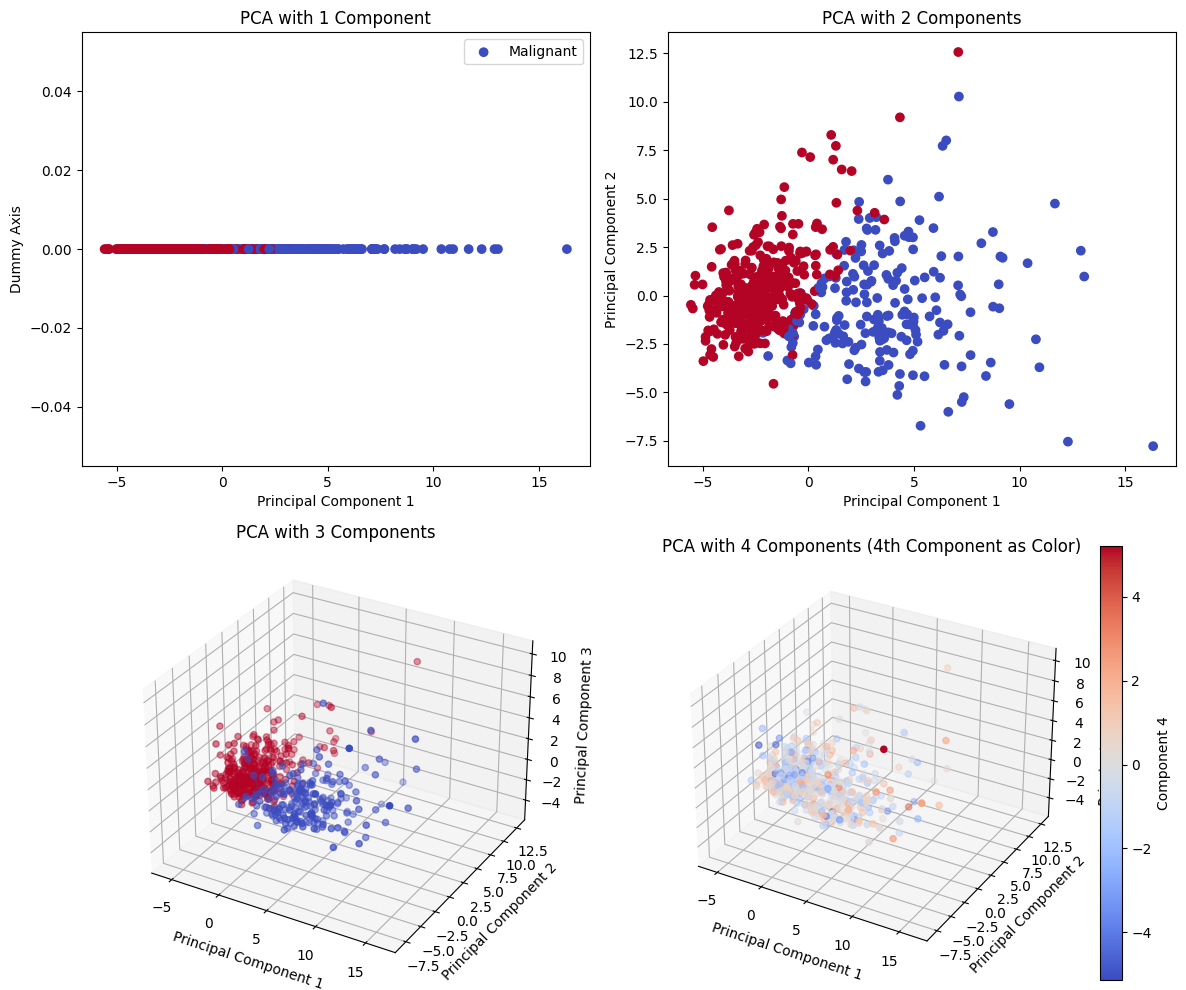

In [10]:
# Experiment with different numbers of components
components_list = [1, 2, 3, 4]  

# Create a subplot to compare PCA results for different components
plt.figure(figsize=(12, 10))

for i, n in enumerate(components_list, start=1):
    X_pca = pca(X_normalized, n)
    
    if n == 1:
        plt.subplot(2, 2, i)
        scatter = plt.scatter(X_pca, np.zeros_like(X_pca), c=y, cmap='coolwarm')
        plt.title(f'PCA with {n} Component')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Dummy Axis')
        plt.legend(["Malignant", "Benign"], loc="upper right")
    
    elif n == 2:
        plt.subplot(2, 2, i)
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
        plt.title(f'PCA with {n} Components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

    elif n == 3:
        ax = plt.subplot(2, 2, i, projection='3d')
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm')
        ax.set_title(f'PCA with {n} Components')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')

    elif n == 4:
        ax = plt.subplot(2, 2, i, projection='3d')
        sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_pca[:, 3], cmap='coolwarm')
        ax.set_title(f'PCA with {n} Components (4th Component as Color)')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.colorbar(sc, ax=ax, label="Component 4")

plt.tight_layout()
plt.show()


### **Color Representation:**

*   In the PCA scatter plots, each point is colored according to its corresponding class label (e.g., `Malignant` or `Benign`).
*   The **color coding** in the scatter plots allows you to visually compare the separation between the two classes (Malignant and Benign) in the reduced-dimensional space (1, 2, 3, or 4 components).
*   **If the colors (classes) are well separated** in the PCA plots, it means that PCA has successfully captured the underlying structure of the data, preserving the separability of the original classes (labels).
*   **If the points overlap significantly** and there is no clear distinction between the colors, it suggests that PCA may not be able to effectively separate the classes with the given number of components.

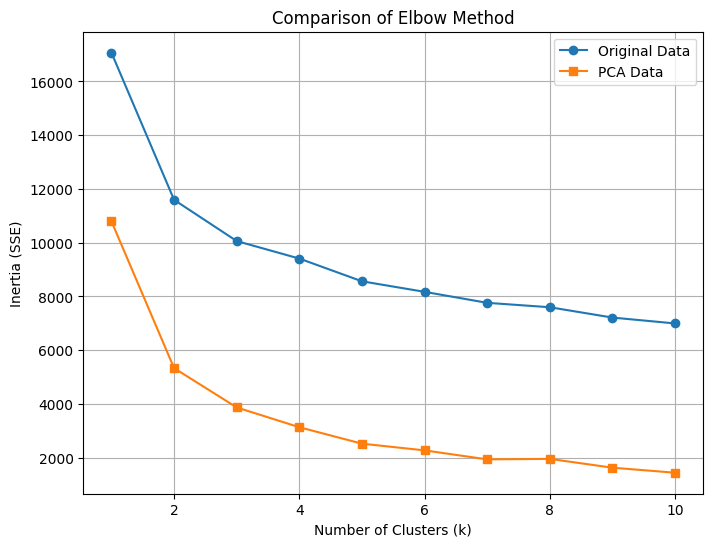

In [11]:
# Function to compute inertia for PCA-transformed data
def compute_inertia_pca(X, max_k=10, n_components=2):
    inertias_pca = []
    X_pca = pca(X, n_components)  # Apply PCA transformation
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_pca)  # Fit the KMeans model on PCA-transformed data
        # Compute the inertia (sum of squared distances to centroids)
        inertias_pca.append(sum(np.min(np.linalg.norm(X_pca[:, np.newaxis] - kmeans.centroids, axis=2)**2, axis=1)))
    return inertias_pca

# Compute SSE for PCA-transformed data with n_components = 2 (you can experiment with others)
inertias_pca = compute_inertia_pca(X_normalized, max_k=10, n_components=2)

# To compare the results, you can also compute the inertia for the original data
inertias_original = compute_inertia(X_normalized, max_k=10)

# Plot the comparison of SSE for both experiments
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias_original, marker='o', label='Original Data')
plt.plot(range(1, 11), inertias_pca, marker='s', label='PCA Data')
plt.title('Comparison of Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Display SSE values
print("before PCA")
for k, inertia in enumerate(inertias_original, start=1):
    print(f"Number of Clusters: {k}, SSE: {inertia:.2f}")

print("\nafter PCA")
# Display SSE values
for k, inertia in enumerate(inertias_pca, start=1):
    print(f"Number of Clusters: {k}, SSE: {inertia:.2f}")


before PCA
Number of Clusters: 1, SSE: 17070.00
Number of Clusters: 2, SSE: 11595.68
Number of Clusters: 3, SSE: 10061.80
Number of Clusters: 4, SSE: 9409.83
Number of Clusters: 5, SSE: 8564.40
Number of Clusters: 6, SSE: 8171.85
Number of Clusters: 7, SSE: 7763.15
Number of Clusters: 8, SSE: 7599.01
Number of Clusters: 9, SSE: 7214.34
Number of Clusters: 10, SSE: 6995.96

after PCA
Number of Clusters: 1, SSE: 10795.62
Number of Clusters: 2, SSE: 5332.98
Number of Clusters: 3, SSE: 3871.15
Number of Clusters: 4, SSE: 3133.96
Number of Clusters: 5, SSE: 2522.32
Number of Clusters: 6, SSE: 2272.63
Number of Clusters: 7, SSE: 1937.54
Number of Clusters: 8, SSE: 1955.93
Number of Clusters: 9, SSE: 1628.10
Number of Clusters: 10, SSE: 1441.34


## SSE Comparison observation :

* After PCA, the SSE is consistently lower across all numbers of clusters compared to before PCA. which means dimensionality reduction has improved the clustering performance by reducing irrelevant features or noise.


**Effectiveness of PCA:**

* The sharp decrease in SSE when moving from 1 to 2 clusters after PCA suggests that PCA effectively captured the major structure of the data, making the clustering more meaningful with fewer clusters.
* This shows that dimensionality reduction helped to make the data more separable and compact, leading to more distinct clusters.
* It also indicated that best K values according to SSE is = 2 which is the actual number of the original different labels in the dataset 

Silhouette Scores for Original Data:
Number of Clusters: 2, Silhouette Score: 0.3447
Number of Clusters: 3, Silhouette Score: 0.3144
Number of Clusters: 4, Silhouette Score: 0.2504
Number of Clusters: 5, Silhouette Score: 0.1675
Number of Clusters: 6, Silhouette Score: 0.1592
Number of Clusters: 7, Silhouette Score: 0.1580
Number of Clusters: 8, Silhouette Score: 0.1441
Number of Clusters: 9, Silhouette Score: 0.1170
Number of Clusters: 10, Silhouette Score: 0.1065

Silhouette Scores for PCA Data:
Number of Clusters: 2, Silhouette Score: 0.5081
Number of Clusters: 3, Silhouette Score: 0.4910
Number of Clusters: 4, Silhouette Score: 0.4654
Number of Clusters: 5, Silhouette Score: 0.3579
Number of Clusters: 6, Silhouette Score: 0.3316
Number of Clusters: 7, Silhouette Score: 0.3500
Number of Clusters: 8, Silhouette Score: 0.3112
Number of Clusters: 9, Silhouette Score: 0.3063
Number of Clusters: 10, Silhouette Score: 0.3258


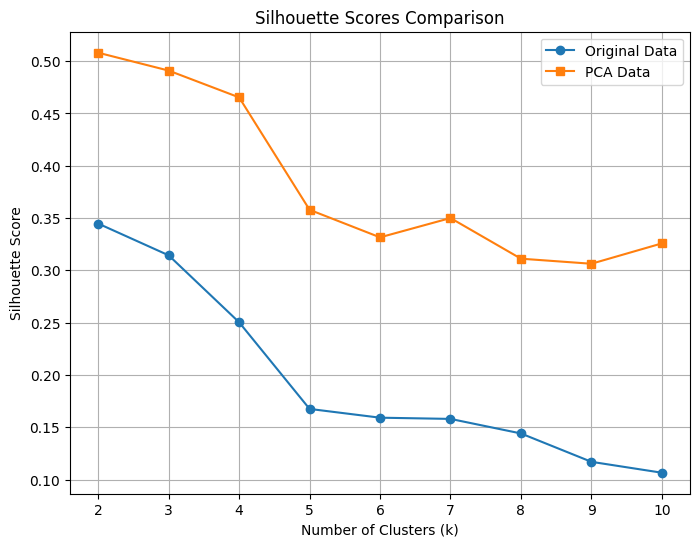

In [13]:
# Function to compute and print silhouette scores for a range of clusters
def compute_silhouette_scores(X, max_k=10, n_components=2):
    silhouette_scores_original = []
    silhouette_scores_pca = []
    
    # Silhouette score for original data
    print("Silhouette Scores for Original Data:")
    for k in range(2, max_k + 1):  # Starts from 2 because silhouette score is undefined for 1 cluster
        kmeans_original = KMeans(n_clusters=k)
        kmeans_original.fit(X)
        score = silhouette_score(X, kmeans_original.labels)
        silhouette_scores_original.append(score)
        print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")
    
    # Silhouette score for PCA-transformed data
    X_pca = pca(X, n_components)  # Apply PCA transformation
    print("\nSilhouette Scores for PCA Data:")
    for k in range(2, max_k + 1):
        kmeans_pca = KMeans(n_clusters=k)
        kmeans_pca.fit(X_pca)
        score = silhouette_score(X_pca, kmeans_pca.labels)
        silhouette_scores_pca.append(score)
        print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")

    return silhouette_scores_original, silhouette_scores_pca 

# Compute silhouette scores for both original and PCA-transformed data
silhouette_scores_original, silhouette_scores_pca = compute_silhouette_scores(X_normalized, max_k=10, n_components=2)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores_original, marker='o', label='Original Data')
plt.plot(range(2, 11), silhouette_scores_pca, marker='s', label='PCA Data')
plt.title('Silhouette Scores Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()


**Main Points**
- This generates a comparison plot of the elbow method for clustering.
- On the x-axis, the number of clusters 𝑘 is plotted, and on the y-axis, the corresponding inertia (SSE) for each 𝑘is plotted
- It compares the inertia for the original data (before PCA) and the inertia for the PCA-transformed data (after dimensionality reduction).
- The elbow method is used to identify the optimal number of clusters by looking for the "elbow" point where the inertia starts to decrease at a slower rate. This is typically the point where adding more clusters no longer significantly improves the clustering performance.

## **comparison**

* intialize and fit kmeans
  
* apply kmeans on X_normalized for features matrix before PCA and on X_pca for after PCA to get both the each predicted labels and compare their results to visualize PCA effect
  
* apply n_clusters (k) = 2 , Since we have two groups: benign and malignant , also it is the best k value predicted from both SSE and elbow method

* plot labels to visualize original labels vs predicted labels pre PCA vs predicted labels post PCA 


In [14]:
n_clusters = 2

# fit on X_normalized before PCA 
kmeans = KMeans(n_clusters)
kmeans.fit(X_normalized)

# Predicted labels
predicted_labels = kmeans.labels

# fit on X_normalized after PCA 
kmeans_pca = KMeans(n_clusters)
kmeans_pca.fit(X_pca)

# Predicted labels PCA
predicted_labels_pca = kmeans_pca.labels



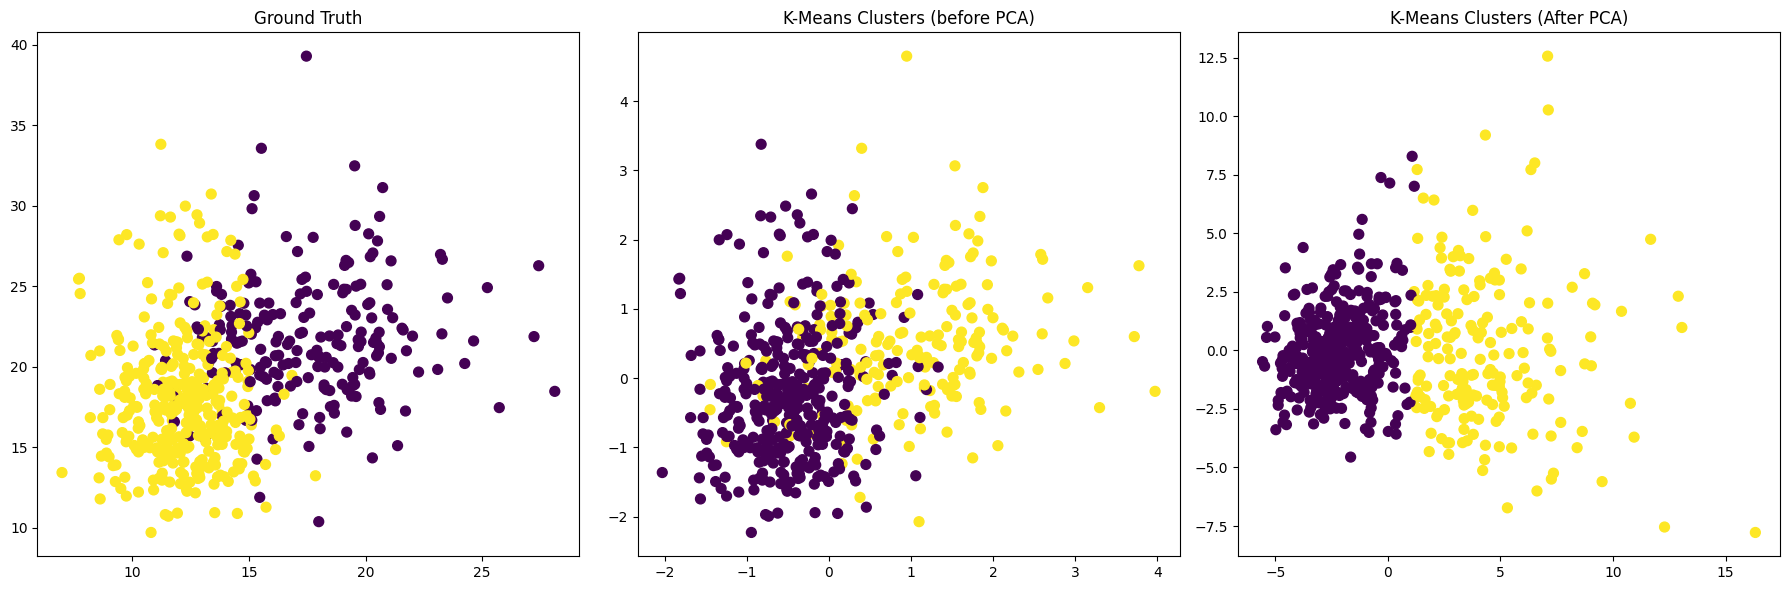

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Ground Truth
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
axs[0].set_title("Ground Truth")

# Plot 2: K-Means Clusters After PCA
axs[1].scatter(X_normalized[:, 0], X_normalized[:, 1], c=predicted_labels, cmap='viridis', s=50)
axs[1].set_title("K-Means Clusters (before PCA)")

# Plot 3: Third Figure (Example: K-Means Clusters with Different Parameters)
axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels_pca, cmap='viridis', s=50)
axs[2].set_title("K-Means Clusters (After PCA)")

# Show the plots
plt.tight_layout()
plt.show()


# Comparison of K-Means Clustering (Before and After PCA)

## 1. Ground Truth (Left Plot)
- Represents the actual labels or clusters in the dataset.
- The clusters are slightly overlapping but distinct in their original dimensions.
- Used as a benchmark to evaluate the performance of clustering algorithms.


## 2. K-Means Clusters (Before PCA) (Middle Plot)
- K-Means clustering is applied directly to the high-dimensional data.
- *Observation*:
  - Clusters are not as distinct, with significant overlap between the two groups.
  - Higher dimensionality likely introduces noise or irrelevant features that hinder clear cluster separation.
- *Limitation*:
  - The algorithm struggles to focus on the most informative features in the data, reducing performance.

## 3. K-Means Clusters (After PCA) (Right Plot)
- PCA is applied before clustering to reduce dimensionality and focus on the most significant variance.
- *Observation*:
  - Clusters are much better separated, with a clearer distinction between the two groups.
  - PCA removes noise and redundancy, enabling K-Means to perform better.
- *Advantage*:
  - The reduced dimensionality enhances the clustering algorithm’s ability to identify meaningful patterns.

## Key Takeaways
1. *Improved Cluster Separation After PCA*:
   - Applying PCA before K-Means significantly enhances the cluster separation, as observed in the right plot.
   - Clusters post-PCA are more compact and distinct.

2. *Noise Reduction*:
   - PCA focuses on components with the highest variance, removing less informative features and noise. This results in more effective clustering.

3. *Dimensionality Reduction Benefits*:
   - Reducing the number of dimensions makes the clustering process faster and more accurate.

4. *K-Means Limitation Without PCA*:
   - When applied directly to high-dimensional data, K-Means struggles to find optimal clusters due to irrelevant or redundant features.

## Conclusion
- PCA helps enhance clustering results by transforming the dataset into a lower-dimensional space that captures the most significant variance.
- This process improves the performance of K-Means by providing it with more meaningful data to work on.